In [1]:
import numpy as np
import pandas as pd
import os, sys
import random as r

sys.path.append(os.path.abspath("C:\\Users\\chris_000\\PycharmProjects\\cisco_project\\src"))
import loader, em, transform, eval_set

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import roc_curve, roc_auc_score
from scipy.sparse import csr_matrix

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 22

In [2]:
from sklearn.externals import joblib

In [3]:
l = joblib.load('../data/report/zero_feat.pkl')

In [19]:
sum(l > 10)

12053

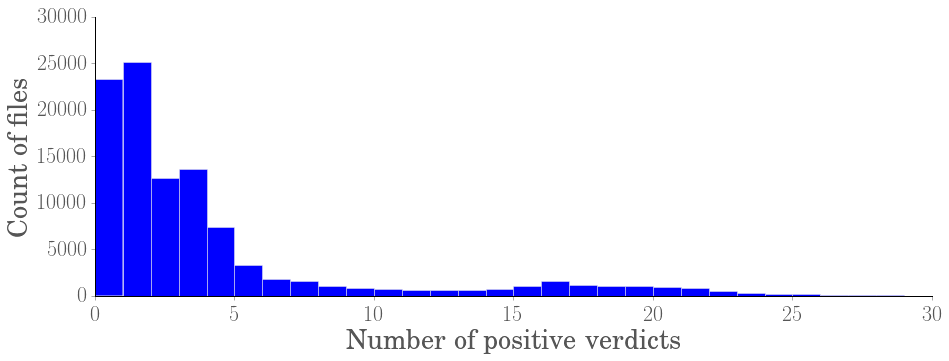

In [16]:
fig, ax = plt.subplots(1,1)
ax.set_axis_bgcolor('white')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.hist(l, bins=np.arange(0,30), color='blue')


ax.set_ylabel('Count of files')
ax.set_xlabel('Number of positive verdicts')
#plt.yscale('log')
fig.savefig('../data/report/chp2_zerofeats.pdf', bbox_inches='tight')

In [9]:
e_v = joblib.load('../data/report/data/eval_verdicts.pkl')

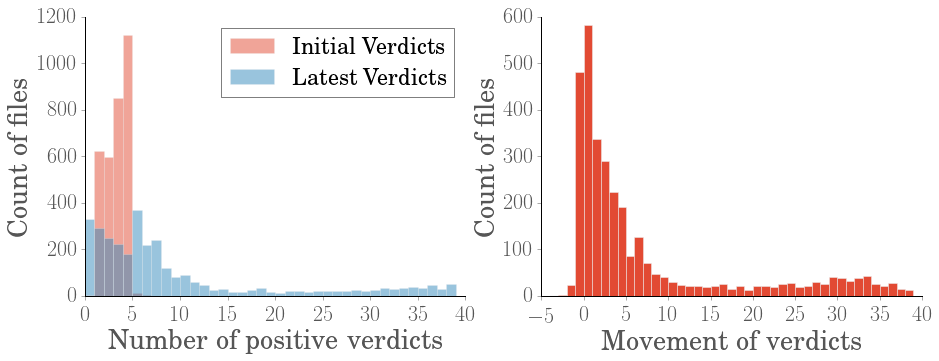

In [10]:
#3,8
#label_count = Y.sum(axis=1)
#inds = 
#lbl_symanteconline = label_count[np.array(Y.transpose()[21], dtype=bool)]
fig, ax = plt.subplots(1,2)
ax[0].set_axis_bgcolor('white')
ax[0].spines['bottom'].set_color('black')
ax[0].spines['left'].set_color('black')
ax[0].xaxis.set_ticks_position('bottom')
ax[0].yaxis.set_ticks_position('left')

ax[0].hist(e_v[0], alpha=0.5, bins=np.arange(0,40), label='Initial Verdicts')
ax[0].hist(e_v[1], alpha=0.5, bins=np.arange(0,40), label='Latest Verdicts')

ax[0].set_xlabel('Number of positive verdicts')
ax[0].set_ylabel('Count of files')

leg = ax[0].legend(loc=1, fontsize=22, frameon = 1)
frame = leg.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')

ax[1].set_axis_bgcolor('white')
ax[1].spines['bottom'].set_color('black')
ax[1].spines['left'].set_color('black')
ax[1].xaxis.set_ticks_position('bottom')
ax[1].yaxis.set_ticks_position('left')

ax[1].hist(e_v[2], bins=np.arange(-4,40))

ax[1].set_xlabel('Movement of verdicts')
ax[1].set_ylabel('Count of files')



#plt.hist(lbl_symanteconline, bins=np.arange(0,40))
fig.savefig('../data/report/chp2_eval_counts.pdf', bbox_inches='tight')

In [11]:
feat_counts = joblib.load('../data/report/data/feat_counts.pkl')

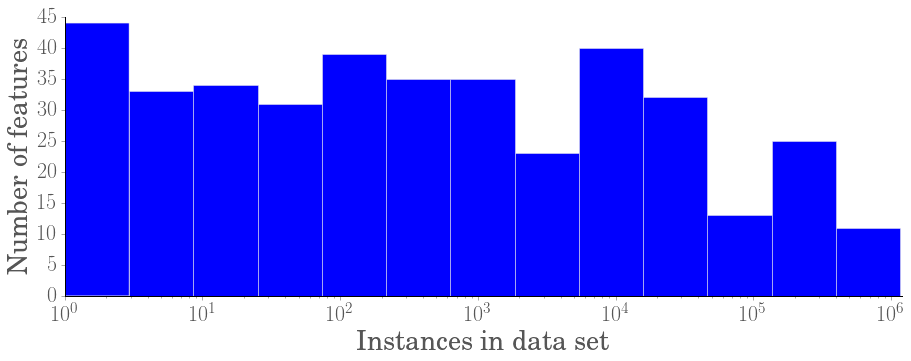

In [15]:
fig, ax = plt.subplots(1,1)
ax.set_axis_bgcolor('white')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.hist(feat_counts, bins=np.logspace(0,7,16), color='blue')

ax.set_xscale('log')
ax.set_xlim([1,1200000])
ax.set_xlabel('Instances in data set')
ax.set_ylabel('Number of features')
#plt.yscale('log')
fig.savefig('../data/report/chp2_featcounts.pdf', bbox_inches='tight')

In [20]:
Z_arr, alpha_arr, beta_arr, pi_arr = joblib.load('../data/output/unsup/res.pkl')

In [34]:
Z = Z_arr[0]
alpha = alpha_arr[0]
beta = beta_arr[0]
pi = pi_arr[0]

Z1 = Z_arr[56]
alpha1 = alpha_arr[56]
beta1 = beta_arr[56]
pi1 = pi_arr[56]

In [88]:
sum(beta > 0.01)

32

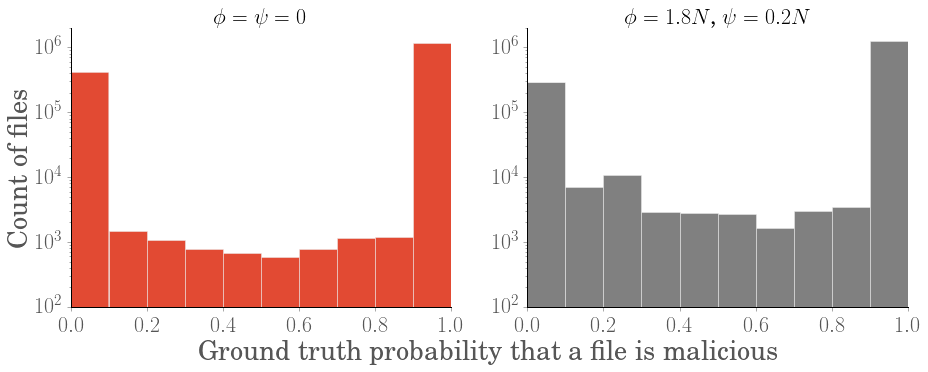

In [78]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax.set_axis_bgcolor('white')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')

ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)


ax0.set_axis_bgcolor('white')
ax0.spines['bottom'].set_color('black')
ax0.spines['left'].set_color('black')
ax0.xaxis.set_ticks_position('bottom')
ax0.yaxis.set_ticks_position('left')

ax1.set_axis_bgcolor('white')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')


ax0.hist(Z, bins=np.arange(0,1.1,0.1))
ax0.set_yscale('log')

ax1.hist(Z1, bins=np.arange(0,1.1,0.1), color='grey')
ax1.set_yscale('log')


ax0.set_ylim([100,2000000])
ax1.set_ylim([100,2000000])

ax0.set_title('$\phi = \psi = 0$', fontsize=22)
ax1.set_title('$\phi = 1.8N$, $\psi = 0.2N$', fontsize=22)

ax.set_ylabel('Count of files')
ax.set_xlabel('Ground truth probability that a file is malicious')

fig.savefig('../data/report/chp3_zdist.pdf', bbox_inches='tight')

In [65]:
avs = ['ahnlab', 'antivir', 'avast', 'avg', 'bitdefender', 'ca_av', 'clamav',
       'command', 'command_online', 'drweb', 'esetnod32', 'f_prot', 'fortinet',
       'gdata', 'ikarus', 'k7computing', 'kaspersky', 'kaspersky_online',
       'mcafee', 'mcafee_beta', 'mcafee_online', 'mcafeegwedition_online',
       'microsoft', 'norman', 'panda', 'panda_online', 'quickheal', 'rising',
       'rising_online', 'sophos', 'sophos_online', 'sunbelt', 'symantec',
       'symantec_beta', 'symantec_online', 'trendmicro', 'trendmicro_beta',
       'trendmicro_consumer', 'vba32', 'virusbuster']

for i in range(0, len(avs)):
    avs[i] = avs[i].replace('_','\_')

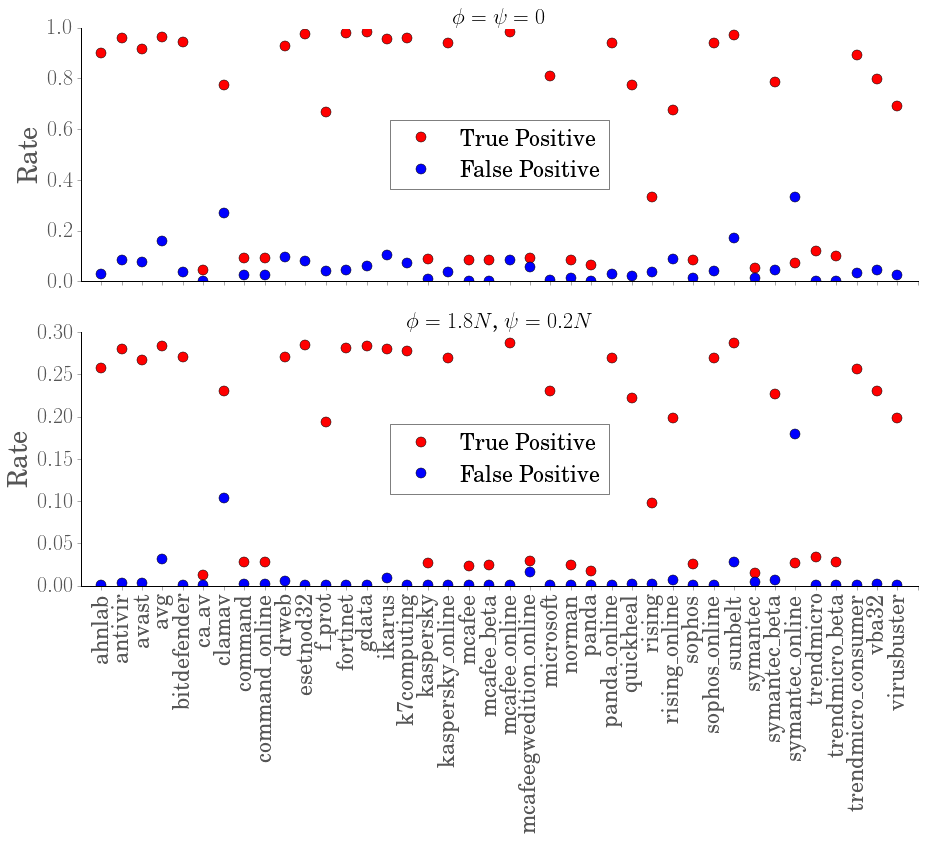

In [79]:
fig = plt.figure()
fig.set_size_inches(15,10)

ax = fig.add_subplot(111)
ax.set_axis_bgcolor('white')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')

ax0 = fig.add_subplot(211)
ax1 = fig.add_subplot(212)

ax0.set_axis_bgcolor('white')
ax0.spines['bottom'].set_color('black')
ax0.spines['left'].set_color('black')
ax0.xaxis.set_ticks_position('bottom')
ax0.yaxis.set_ticks_position('left')

ax1.set_axis_bgcolor('white')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')


ax0.plot(alpha,'ro',label='True Positive', markersize=10)
ax0.plot(beta,'bo',label='False Positive', markersize=10)
ax0.set_xticks(np.arange(41))
#ax.set_xticklabels(RL_final.columns[4:], rotation='vertical')
leg = ax0.legend(loc=10, fontsize=22, frameon = 1, numpoints=1)
frame = leg.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')
ax0.set_title('$\phi = \psi = 0$', fontsize=22)
ax0.set_xlim([-1,40])

ax1.plot(alpha1,'ro',label='True Positive', markersize=10)
ax1.plot(beta1,'bo',label='False Positive', markersize=10)
ax1.set_xticks(np.arange(41))
#ax.set_xticklabels(RL_final.columns[4:], rotation='vertical')
leg2 = ax1.legend(loc=10, fontsize=22, frameon = 1, numpoints=1)
frame2 = leg2.get_frame()
frame2.set_facecolor('white')
frame2.set_edgecolor('black')
ax1.set_title('$\phi = 1.8N$, $\psi = 0.2N$', fontsize=22)
ax1.set_xlim([-1,40])

ax0.set_ylabel('Rate')
ax1.set_ylabel('Rate')

ax0.set_xticklabels([])
ax1.set_xticklabels(avs, rotation='vertical')

fig.savefig('../data/report/chp3_tpfp.pdf', bbox_inches='tight')

In [31]:
verdicts = joblib.load('../data/report/data/verdicts.pkl')

In [61]:
#verdicts = Y_train.sum(axis=1)
propn = np.zeros(41)
for i in range(0, 41):
    amt = Z[verdicts==i]
    if len(amt) > 0:
        propn[i] = sum(amt) / len(amt)
    else: propn[i] = 0

propn1 = np.zeros(41)
for i in range(0, 41):
    amt = Z1[verdicts==i]
    if len(amt) > 0:
        propn1[i] = sum(amt) / len(amt)
    else: propn1[i] = 0
        
    
propn2 = np.zeros(41)
for i in range(0, 41):
    amt = Z_arr[5][verdicts==i]
    if len(amt) > 0:
        propn2[i] = sum(amt) / len(amt)
    else: propn2[i] = 0

propn3 = np.zeros(41)
for i in range(0, 41):
    amt = Z_arr[30][verdicts==i]
    if len(amt) > 0:
        propn3[i] = sum(amt) / len(amt)
    else: propn3[i] = 0

propn4 = np.zeros(41)
for i in range(0, 41):
    amt = Z_arr[-1][verdicts==i]
    if len(amt) > 0:
        propn4[i] = sum(amt) / len(amt)
    else: propn4[i] = 0

        


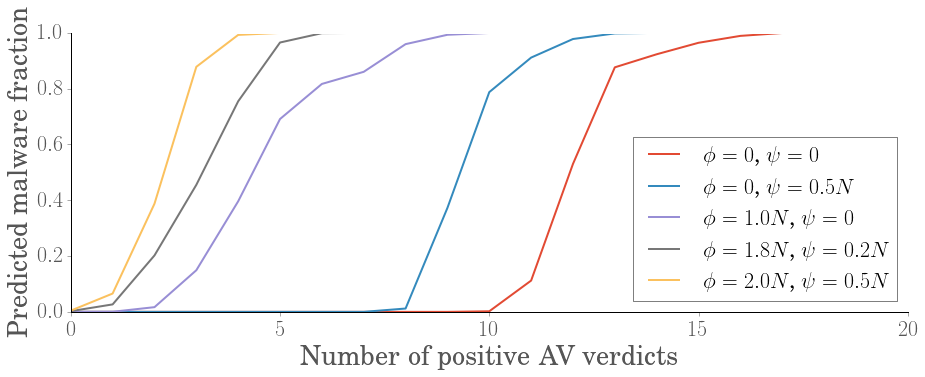

In [80]:
fig, ax = plt.subplots(1,1)

ax.set_axis_bgcolor('white')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.plot(propn, label='$\phi=0$, $\psi = 0$', linewidth = 2)
ax.plot(propn2, label='$\phi=0$, $\psi = 0.5N$', linewidth = 2)
ax.plot(propn3, label='$\phi=1.0N$, $\psi = 0$', linewidth = 2)
ax.plot(propn1, label='$\phi=1.8N$, $\psi = 0.2N$', linewidth = 2)
ax.plot(propn4, label='$\phi=2.0N$, $\psi = 0.5N$', linewidth = 2)

leg = ax.legend(loc=4, fontsize=22, frameon = 1)
frame = leg.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')

ax.set_xlim([0,20])
ax.set_xlabel("Number of positive AV verdicts")
ax.set_ylabel("Predicted malware fraction")

fig.savefig('../data/report/chp3_zfrac.pdf', bbox_inches='tight')

In [89]:
clfs_em = joblib.load('../data/report/data/clfs_em.pkl')

In [90]:
len(clfs_em)

72

In [91]:
def misclassification_error(clf, feats, labels):
    return clf.score(feats, labels)

def cross_entropy_error(clf, feats, labels):
    res = clf.predict_log_proba(feats)
    loss = 0.0
    for ind in range(0, len(res)):
        loss += res[ind][labels[ind]]
    return loss / len(labels)

def get_roc(clf, feats, labels):
    probs = clf.predict_proba(feats)
    fpr, tpr, _ = roc_curve(labels, probs[:,1], pos_label=1)
    auc = roc_auc_score(labels, probs[:,1])
    return fpr, tpr, auc

In [94]:
clfs = [clfs_em[i] for i in [0,56,65]]

In [106]:
tpfp_eval = joblib.load('../data/report/data/tpfp_eval.pkl')

In [95]:
tpfp_test = joblib.load('../data/report/data/tpfp_test.pkl')

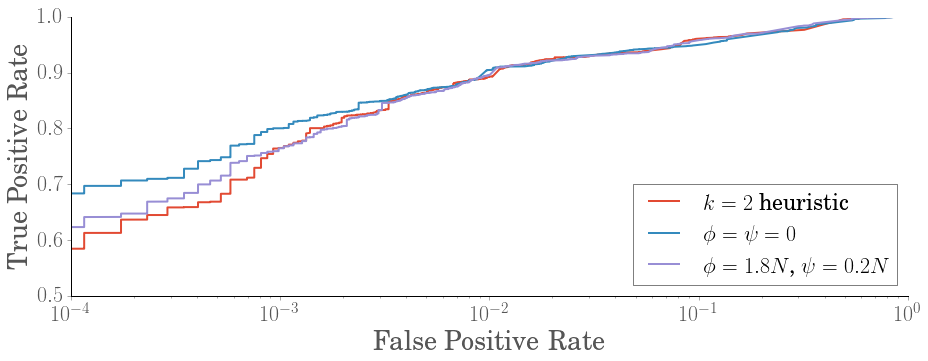

In [108]:
fig, ax = plt.subplots(1,1)
ax.set_axis_bgcolor('white')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

no_discrim = 10**(np.arange(-5,0,0.1))

labels=["$k=2$ heuristic","$k=15$ heuristic","$\phi = \psi = 0$","$\phi=1.8N$, $\psi=0.2N$","$\phi=2.0N$, $\psi=0.5N$"]
ind = -1
for i in tpfp_test:
    ind += 1
    if ind in [1,4]: continue
    ax.semilogx(i[0], i[1],label=labels[ind], linewidth=2)
    

#ax.plot(no_discrim,no_discrim,'--',color='black',linewidth=2)

leg = ax.legend(loc=4, fontsize=22, frameon = 1)
frame = leg.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')
ax.set_xlim([1e-4,1])
ax.set_ylim([0.5,1])
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")

fig.savefig('../data/report/chp3_test_roc.pdf', bbox_inches='tight')

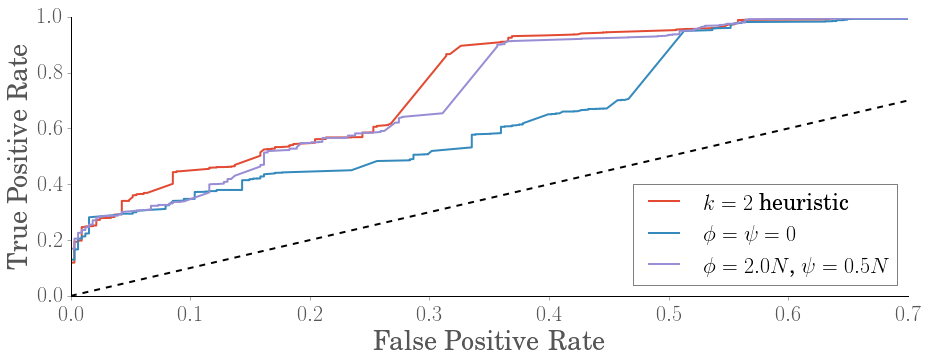

In [114]:
fig, ax = plt.subplots(1,1)
ax.set_axis_bgcolor('white')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

no_discrim = 10**(np.arange(-5,0,0.1))

labels=["$k=2$ heuristic","$k=3$ heuristic","$\phi = \psi = 0$","$\phi=1.8N$, $\psi=0.2N$","$\phi=2.0N$, $\psi=0.5N$"]
ind = -1
for i in tpfp_eval:
    ind += 1
    if ind in [1,3]: continue
    ax.plot(i[0], i[1],label=labels[ind], linewidth=2)
    

ax.plot(no_discrim,no_discrim,'--',color='black',linewidth=2)

leg = ax.legend(loc=4, fontsize=22, frameon = 1)
frame = leg.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')
ax.set_xlim([0,0.7])
#ax.set_ylim([0.5,1])
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")

fig.savefig('../data/report/chp3_eval_roc.pdf', bbox_inches='tight')

In [117]:
tpfp_test_sup

[[array([ 0.        ,  0.        ,  0.        , ...,  0.99994206,
          0.99994206,  1.        ]),
  array([ 0.0873413 ,  0.08802991,  0.09296017, ...,  0.99999738,
          1.        ,  1.        ])],
 [array([ 0.        ,  0.        ,  0.        , ...,  0.99988412,
          1.        ,  1.        ]),
  array([ 0.21142522,  0.21180749,  0.21964407, ...,  0.99999738,
          0.99999738,  1.        ])],
 [array([ 0.        ,  0.        ,  0.        , ...,  0.99994206,
          0.99994206,  1.        ]),
  array([ 0.23136097,  0.23310737,  0.25977477, ...,  0.99999738,
          1.        ,  1.        ])]]

In [115]:
tpfp_test_sup = joblib.load('../data/report/data/tpfp_test_sup.pkl')
tpfp_eval_sup = joblib.load('../data/report/data/tpfp_eval_sup.pkl')

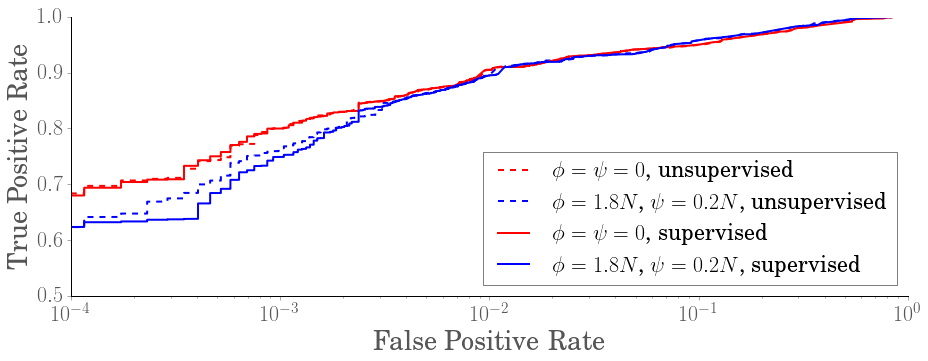

In [122]:
fig, ax = plt.subplots(1,1)
ax.set_axis_bgcolor('white')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

no_discrim = 10**(np.arange(-5,0,0.1))

labels=["$\phi = \psi = 0$, unsupervised","$\phi=1.8N$, $\psi=0.2N$, unsupervised",
        "$\phi = \psi = 0$, supervised","$\phi=1.8N$, $\psi=0.2N$, supervised"]

lines = ['r--','b--','r-','b-']
ind = -1
ind2 = 0
for i in tpfp_test:
    ind += 1
    if ind in [0,1,4]: continue
    ax.semilogx(i[0], i[1],lines[ind2],label=labels[ind2], linewidth=2)
    ind2 += 1
    
ind = -1
for i in tpfp_test_sup:
    ind += 1
    if ind in [2]: continue
    ax.semilogx(i[0], i[1],lines[ind2],label=labels[ind2], linewidth=2)
    ind2 += 1

#ax.plot(no_discrim,no_discrim,'--',color='black',linewidth=2)

leg = ax.legend(loc=4, fontsize=22, frameon = 1)
frame = leg.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')
ax.set_xlim([1e-4,1])
ax.set_ylim([0.5,1])
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")

fig.savefig('../data/report/chp4_test_roc.pdf', bbox_inches='tight')

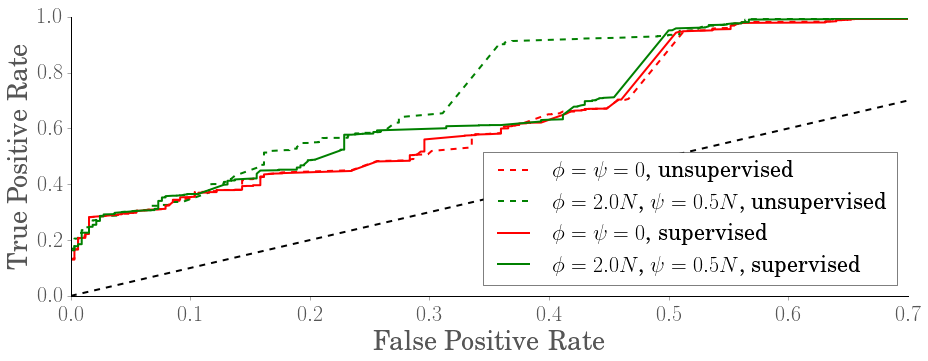

In [123]:
fig, ax = plt.subplots(1,1)
ax.set_axis_bgcolor('white')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

no_discrim = 10**(np.arange(-5,0,0.1))

labels=["$\phi = \psi = 0$, unsupervised","$\phi=2.0N$, $\psi=0.5N$, unsupervised",
        "$\phi = \psi = 0$, supervised","$\phi=2.0N$, $\psi=0.5N$, supervised"]

lines = ['r--','g--','r-','g-']
ind = -1
ind2 = 0
for i in tpfp_eval:
    ind += 1
    if ind in [0,1,3]: continue
    ax.plot(i[0], i[1],lines[ind2],label=labels[ind2], linewidth=2)
    ind2 += 1
    
ind = -1
for i in tpfp_eval_sup:
    ind += 1
    if ind in [1]: continue
    ax.plot(i[0], i[1],lines[ind2],label=labels[ind2], linewidth=2)
    ind2 += 1

ax.plot(no_discrim,no_discrim,'--',color='black',linewidth=2)

leg = ax.legend(loc=4, fontsize=22, frameon = 1)
frame = leg.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')
ax.set_xlim([0,0.7])
#ax.set_ylim([0.5,1])
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")


fig.savefig('../data/report/chp4_eval_roc.pdf', bbox_inches='tight')

In [124]:
z_vals = joblib.load('../data/report/data/sup_zvals.pkl')

In [125]:
propn10 = np.zeros(41)
for i in range(0, 41):
    amt = z_vals[0][verdicts==i]
    if len(amt) > 0:
        propn10[i] = sum(amt) / len(amt)
    else: propn10[i] = 0

propn11 = np.zeros(41)
for i in range(0, 41):
    amt = z_vals[1][verdicts==i]
    if len(amt) > 0:
        propn11[i] = sum(amt) / len(amt)
    else: propn11[i] = 0
        
    
propn12 = np.zeros(41)
for i in range(0, 41):
    amt = z_vals[2][verdicts==i]
    if len(amt) > 0:
        propn12[i] = sum(amt) / len(amt)
    else: propn12[i] = 0


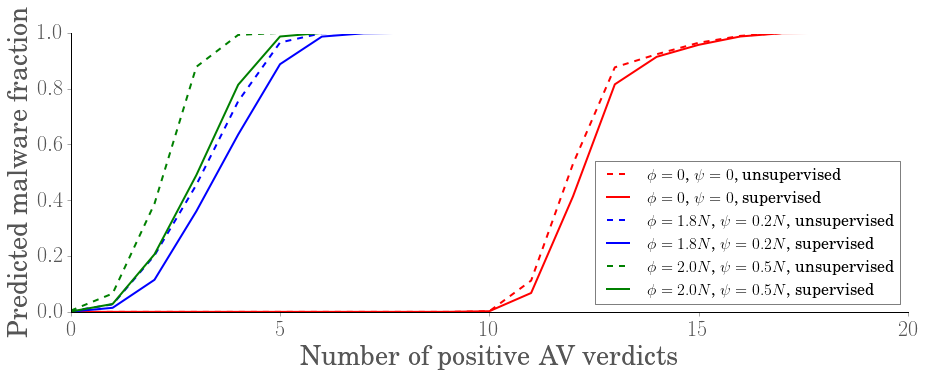

In [130]:
fig, ax = plt.subplots(1,1)

ax.set_axis_bgcolor('white')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.plot(propn, 'r--', label='$\phi=0$, $\psi = 0$, unsupervised', linewidth = 2)
ax.plot(propn10, 'r-', label='$\phi=0$, $\psi = 0$, supervised', linewidth = 2)
ax.plot(propn1, 'b--', label='$\phi=1.8N$, $\psi = 0.2N$, unsupervised', linewidth = 2)
ax.plot(propn11, 'b-', label='$\phi=1.8N$, $\psi = 0.2N$, supervised', linewidth = 2)
ax.plot(propn4, 'g--', label='$\phi=2.0N$, $\psi = 0.5N$, unsupervised', linewidth = 2)
ax.plot(propn12, 'g-', label='$\phi=2.0N$, $\psi = 0.5N$, supervised', linewidth = 2)

leg = ax.legend(loc=4, fontsize=16, frameon = 1)
frame = leg.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')

ax.set_xlim([0,20])
ax.set_xlabel("Number of positive AV verdicts")
ax.set_ylabel("Predicted malware fraction")

fig.savefig('../data/report/chp4_zfrac.pdf', bbox_inches='tight')